In [48]:
#/usr/bin/python3.8
# Use jupyter notebook with python 3+
"""
Auth : Al Sabawi
Date: Mar 14, 2020
Last Update : Mar 21, 2020
"""
# Need the following libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.signal import argrelextrema
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Markdown as md

# USA : Location by County & State

In [49]:
#Enter County, State
county = 'Broome'
state = 'New York'

country = 'US'
loc_key = ', '.join((county,state,country))

##### Analysis by Al Sabawi
##### Date: Mar 14, 2020
##### Last Update : Apr 6, 2020
# Region : {{loc_key}}

In [50]:
#Helper Functions
import io
import requests
def GetCSVFromURL(filename):
    base = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
    url = base+filename
    s=requests.get(url).content
    c=pd.read_csv(url,encoding = 'utf-8')
    return c

## Data Source

#### Johns Hupkins Whiting School of Engineering COVID-19 Data Repository at https://github.com/CSSEGISandData

## Download the data to your computer daily

In [51]:
## Download the latest data file from:
## https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
## File name "time_series_19-covid-Confirmed.csv"  for all confirmed cases in the world by region
## *** DOWNLOAD to local directory ***
confirmed_filename = 'time_series_covid19_confirmed_US.csv'
#recovered_filename = 'time_series_covid19_recovered_US.csv'
deaths_filename = 'time_series_covid19_deaths_US.csv'

## If you are reading from files downloaded to local directory, uncomment the lines below
#df_confirmed = pd.read_csv(confirmed_filename)
#df_recovered = pd.read_csv(recovered_filename)
#df_deaths = pd.read_csv(deaths_filename)

## If the following 3 lines of code are no longer commented out, then
## you DON'T NEED to download the 3 files to local directory. 
df_confirmed = GetCSVFromURL(confirmed_filename)
#df_recovered = GetCSVFromURL(recovered_filename)
df_deaths = GetCSVFromURL(deaths_filename)

## Separate the dates to use as an index later
dates = df_confirmed.columns[11:]
#print(dates)
## Filter for a specific region data only 

usa = df_confirmed[df_confirmed['Combined_Key'].values == loc_key].copy(deep=True)
#usa_recovered = df_recovered[df_recovered['Combined_Key'].values == loc_key].copy(deep=True)
usa_deaths = df_deaths[df_deaths['Combined_Key'].values == loc_key].copy(deep=True)

usad = usa[dates].copy(deep=True)
last_date = usa[dates].columns[-1]

## Put the US data into a DataFrame Series and give it a name
colname = 'Confirmed '+loc_key+' COVID-19 Cases'
#colname_recovered = 'Recovered in '+loc_key+' from COVID-19 Cases'
colname_deaths = 'Deaths in '+loc_key+' from COVID-19 Cases'

us_df_cumulative = pd.DataFrame(usa[dates].sum(), columns=[colname])
us_df_cumulative['dates'] = dates
#us_df_recovered_cum = pd.DataFrame(usa_recovered[dates].sum(), columns=[colname_recovered])
us_df_deaths_cum = pd.DataFrame(usa_deaths[dates].sum(), columns=[colname_deaths])

# Check: These 2 following prints should give the same number on same Last Dates data is collected
#print(last_date, usad[last_date].sum())
#print(us_df_cumulative[-1:])

## Plot the confirmed COVID-19 Cases

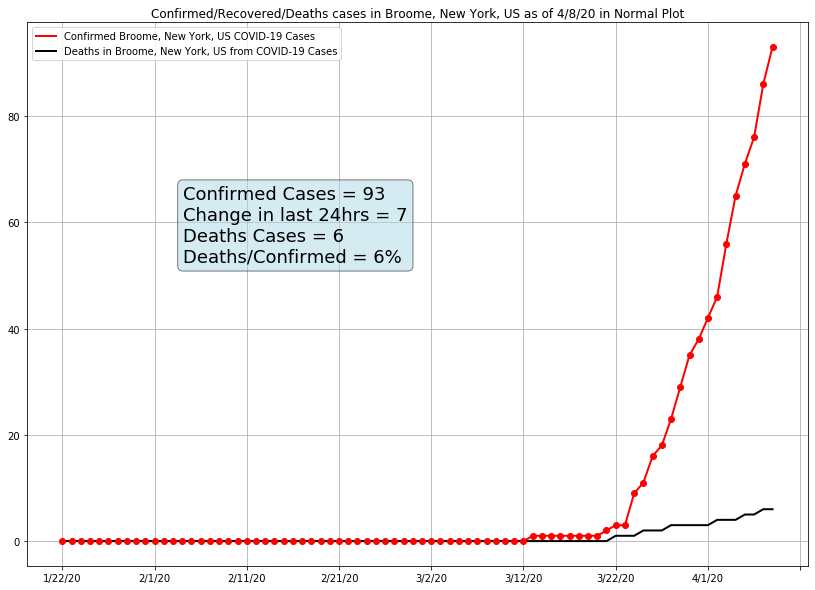

In [52]:
## Plot the raw data (not logarithmic)
fig, ax = plt.subplots(figsize=(14,10))
#us_df = pd.DataFrame(usa[dates].sum(), columns=[colname])

us_df_cumulative.plot(ax=ax,c='red', lw=2,title='Confirmed/Recovered/Deaths cases in '+loc_key+' as of '+str(us_df_cumulative.index[-1])+' in Normal Plot')
#us_df_recovered_cum.plot(ax=ax,c='green', lw=2)
us_df_deaths_cum.plot(ax=ax,c='black', lw=2)

ax.plot(us_df_cumulative[colname],'o',c='red',lw=8)

last_conf = us_df_cumulative[colname][-1:][0]
#last_recov = us_df_recovered_cum[colname_recovered][-1:][0]
last_death = us_df_deaths_cum[colname_deaths][-1:][0]
last_conf_change = us_df_cumulative[colname][-1:][0] - us_df_cumulative[colname][-2:][0]

textstr = '\n'.join((
        r'Confirmed Cases = %.0f' % (last_conf, ),
        r'Change in last 24hrs = %.0f' % (last_conf_change,),
        r'Deaths Cases = %.0f' % (last_death, ),
        r'Deaths/Confirmed = %.0f%%' % (last_death*100/last_conf, )))

props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)
ax.text(0.2, 0.70, textstr, transform=ax.transAxes, fontsize=18,
        verticalalignment='top', bbox=props)

ax.grid(True,which="both")

## Change Confirmed COVID-19 Cases Linear Charts

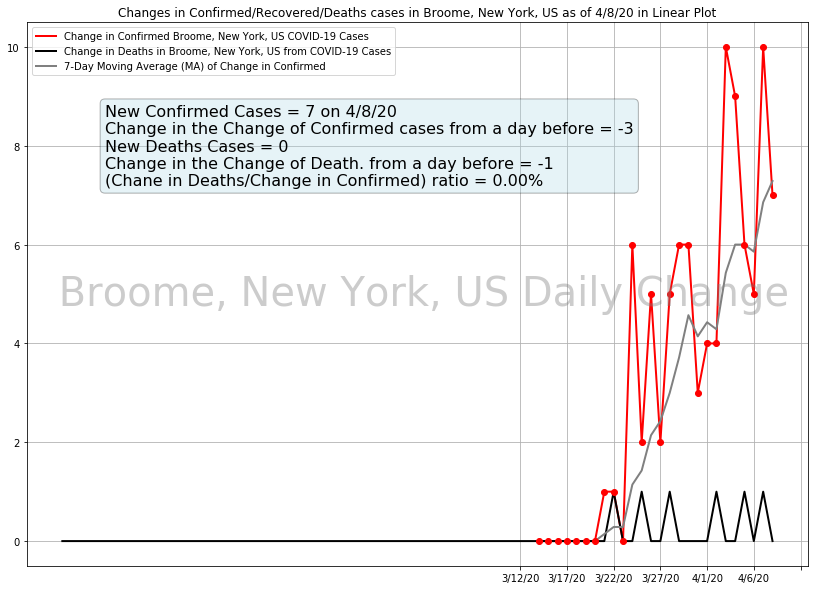

In [60]:
## Plot the raw data (not logarithmic)
fig, ax = plt.subplots(figsize=(14, 10))

us_df_cumulative[colname].diff(1).plot(ax=ax,c='red',lw=2, 
                              title='Changes in Confirmed/Recovered/Deaths cases in ' + loc_key +' as of ' + str(us_df_cumulative.index[-1]) +' in Linear Plot')
#us_df_recovered_cum[colname_recovered].diff(1).plot(ax=ax, c='green', lw=2)
us_df_deaths_cum[colname_deaths].diff(1).plot(ax=ax, c='black', lw=2)

last_conf = us_df_cumulative[colname].diff(1)[-1:][0]
#last_recov = us_df_recovered_cum[colname_recovered].diff(1)[-1:][0]
last_death = us_df_deaths_cum[colname_deaths].diff(1)[-1:][0]
last_conf_change = us_df_cumulative[colname].diff(1)[-1:][0] - us_df_cumulative[
    colname].diff(1)[-2:][0]

#last_recov_change = us_df_recovered_cum[colname_recovered].diff(1)[-1:][0] - us_df_recovered_cum[
#    colname_recovered].diff(1)[-2:][0]


last_death_change = us_df_deaths_cum[colname_deaths].diff(1)[-1:][0] - us_df_deaths_cum[
    colname_deaths].diff(1)[-2:][0]


MAperiod = 7
TheCurveMA_df = pd.DataFrame()
TheCurveMA_df['7-Day Moving Average (MA)'] = us_df_cumulative[colname].diff(1).rolling(
    window=MAperiod).mean()

TheCurveMA_df.plot(
    ax=ax,
    c='gray',
    lw=2)


ax.plot(us_df_cumulative[colname].diff(1), 'o', c='red', lw=8,label='_Hidden',)


textstr = '\n'.join(
    (r'New Confirmed Cases = %.0f on ' % (last_conf, ) +  str(us_df_cumulative.index[-1]) ,
     r'Change in the Change of Confirmed cases from a day before = %.0f' % (last_conf_change, ),
     r'New Deaths Cases = %.0f' % (last_death, ),
     r'Change in the Change of Death. from a day before = %.0f' % (last_death_change, ),
     r'(Chane in Deaths/Change in Confirmed) ratio = %.2f%%' % (last_death * 100 / last_conf, )))

props = dict(boxstyle='round', facecolor='lightblue', alpha=0.3)
ax.text(0.1,
        0.85,
        textstr,
        transform=ax.transAxes,
        fontsize=16,
        fontfamily='sans-serif',
        verticalalignment='top',
        bbox=props)

ax.text(0.5,
        0.5,
        ' '+loc_key + ' Daily Change',
        horizontalalignment='center',
        color='gray',
        fontsize=40,
        alpha=0.4,
        verticalalignment='center',
        transform=ax.transAxes)

ax.grid(True, which="both")
ax.legend(['Change in '+colname, 'Change in '+colname_deaths, '7-Day Moving Average (MA) of Change in Confirmed'])
plt.show()

## Calculate R-naught 

### Form more info on R-naught, check https://en.wikipedia.org/wiki/Basic_reproduction_number

In [53]:
## ASSUMPTION:
##    1) In early stages of contagion, there is NO limiting factor for the spreading of virus
##    2) Uninficted Population is very close to total population
##    3) Assume Free movement (No lockdowns) of individuals in and out of areas affected by virus
##

## Find Last day's total cases
TotalCasesToDate = us_df_cumulative[colname][-1:][0]

## Create a new Series that calculates the difference from day to day

ChangeFromDay2Next = us_df_cumulative[colname].diff(1)
us_df_cumulative[colname] = us_df_cumulative[us_df_cumulative[colname] > 0].copy(deep=True)
us_df_cumulative[colname] = us_df_cumulative[colname].dropna()
ChangeFromDay2NextPercent = us_df_cumulative[colname].pct_change(1)

## Find the Average change from day to day
AverageChangeFromDay2Next = ChangeFromDay2Next.mean()

## Create a series of R0 by calculating the ratio of one day to the day before
r0 = [] # Will record the ratio day to day, start from day 1 to last day
for day in range(1,len(ChangeFromDay2Next)):
    if(ChangeFromDay2Next[day-1:][0] == 0): # Avoid dividing by zero
        r0.append(0)
    else:
        r0.append(ChangeFromDay2Next[day:][0]/ChangeFromDay2Next[day-1:][0] )  

## Look back 20 days only. This is the most relevant data        
GoBackDays = 20
dict0 = {'Date' : us_df_cumulative.index[-GoBackDays:].values, 'R-Naught' : r0[-GoBackDays:]}
R_Naught= pd.DataFrame(dict0)    
R_Naught = R_Naught.set_index('Date')

#print('ChangeFromDay2Next' , ChangeFromDay2Next[-1:][0])
DailyDelta = ChangeFromDay2Next[-1:][0]

#print(us_df_cumulative['Actual USA COVID-19 Cases'][-2:][0])
DailyDeltaPercent = 100 * DailyDelta /us_df_cumulative[colname][-2:][0]

## Descriptive Summary

In [54]:
#print report
print('-- This is for region :', loc_key)
print("-- Total cases as of " +str(us_df_cumulative.index[-1:][0]) + "(End of day) is "+str(TotalCasesToDate),
      'cases' )
print("-- Average case count change from one day to next = ", np.round(AverageChangeFromDay2Next,2),' cases')

print("-- Change in "+loc_key+" confirmed COVID-19 cases FROM",
      str(us_df_cumulative.index[-2:][0]), "TO", 
      str(us_df_cumulative.index[-1:][0])+ "(End of day) is " + str(int(DailyDelta)),'cases',
      "OR " +str(np.round(DailyDeltaPercent,2)) + '% from previous case total. ', '\n-- This is', 
      np.round((DailyDelta/AverageChangeFromDay2Next),2) ,
      'Times the Average count in daily changes. \n-- The current Average PERCENT(%) change from day to day is' , 
      str(np.round(100*ChangeFromDay2NextPercent.mean(),2) )+'%'+' from previous case total.', 
      "This means it's Above or Below (if negative) the average daily % change by "+ str(np.round(100*ChangeFromDay2NextPercent.mean(),2) )+'%')
print("-- R-naught value as of end-of-day",str(us_df_cumulative.index[-1:][0]), 'IS', 
      np.round(R_Naught['R-Naught'][-1:][0],4) )
print('-- The average R-naught from the past',GoBackDays,'days is', np.round( R_Naught['R-Naught'].mean(),4))

-- This is for region : Broome, New York, US
-- Total cases as of 4/8/20(End of day) is 93 cases
-- Average case count change from one day to next =  1.21  cases
-- Change in Broome, New York, US confirmed COVID-19 cases FROM 4/7/20 TO 4/8/20(End of day) is 7 cases OR 8.14% from previous case total.  
-- This is 5.8 Times the Average count in daily changes. 
-- The current Average PERCENT(%) change from day to day is 23.41% from previous case total. This means it's Above or Below (if negative) the average daily % change by 23.41%
-- R-naught value as of end-of-day 4/8/20 IS 0.7
-- The average R-naught from the past 20 days is 0.9683


## Plot R-naught as a Time Series

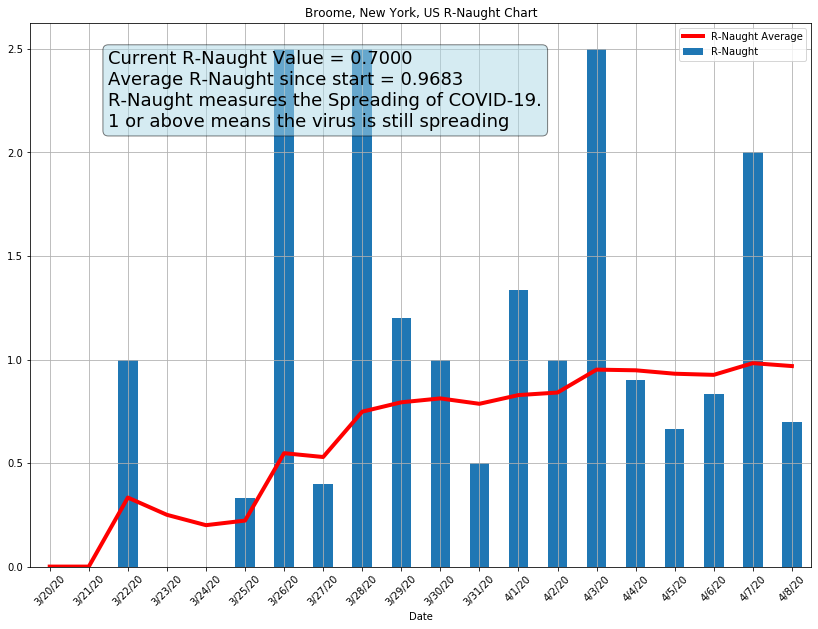

In [55]:
#R-naught
fig, ax = plt.subplots(figsize=(14,10))
ax.grid(True)
R_Naught['R-Naught'].plot(ax=ax,kind='bar',title=loc_key+' R-Naught Chart')
R_Naught['R-Naught Average'] = R_Naught.expanding().mean()
R_Naught['R-Naught Average'].plot(ax=ax,c='r',grid=True,lw=4)
ax.legend()

textstr = '\n'.join((
        r'Current R-Naught Value = %.4f' % (R_Naught['R-Naught'][-1:][0], ),
        r'Average R-Naught since start = %.4f' % (R_Naught['R-Naught Average'][-1:][0],),
        r'R-Naught measures the Spreading of COVID-19.',
        r'1 or above means the virus is still spreading'))

props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)
ax.text(0.1, 0.95, textstr, transform=ax.transAxes, fontsize=18,
        verticalalignment='top', bbox=props)

_ = plt.xticks(rotation=45)
